# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
data = np.loadtxt('imu(in).csv', delimiter=',')

g = 9.80665

# Get relevant coloums:
timestamp_ms = (data[:,0] - data[0,0])/1e6

gyro_roll = data[:,1]
gyro_pitch = data[:,2]
gyro_yaw = data[:,3]

acc_x = data[:,6]
acc_y = data[:,7]
acc_z = data[:,8]


## Statistics

In [3]:
mean_acc_x = np.mean(acc_x)
mean_acc_y = np.mean(acc_y)
mean_acc_z = np.mean(acc_z)

var_acc_x = np.var(acc_x)
var_acc_y = np.var(acc_y)
var_acc_z = np.var(acc_z)

mean_gyro_roll = np.mean(gyro_roll)
mean_gyro_pitch = np.mean(gyro_pitch)
mean_gyro_yaw = np.mean(gyro_yaw)

var_gyro_roll = np.var(gyro_roll)
var_gyro_pitch = np.var(gyro_pitch)
var_gyro_yaw = np.var(gyro_yaw)

print("Acceleration statistics:")
print("x:")
print("Mean: " + str(mean_acc_x) + ", var: " + str(var_acc_x))
print("y:")
print("Mean: " + str(mean_acc_y) + ", var: " + str(var_acc_y))
print("z:")
print("Mean: " + str(mean_acc_z + g) + ", var: " + str(var_acc_z))

print("Gyro statistics:")
print("Roll:")
print("Mean: " + str(mean_gyro_roll) + ", var: " + str(var_gyro_roll))
print("Pitch:")
print("Mean: " + str(mean_gyro_pitch) + ", var: " + str(var_gyro_pitch))
print("Yaw:")
print("Mean: " + str(mean_gyro_yaw) + ", var: " + str(var_gyro_yaw))

Acceleration statistics:
x:
Mean: -0.03499647428620614, var: 0.0006481024529140827
y:
Mean: 0.24788396636006388, var: 0.0003805693899042063
z:
Mean: -0.04691959344584973, var: 0.00042679794387202175
Gyro statistics:
Roll:
Mean: -0.00022985111426492615, var: 1.0331749349841904e-05
Pitch:
Mean: -0.003987253613517955, var: 1.778490575444831e-05
Yaw:
Mean: 0.00025404049630382716, var: 1.4082962103525893e-05


## Number of outliers

In [4]:
var_max_acc = max(var_acc_x, var_acc_y, var_acc_z)
var_max_gyro = max(var_gyro_roll, var_gyro_pitch, var_gyro_yaw)

t_a = 3*np.sqrt(var_max_acc)
t_g = 3*np.sqrt(var_max_gyro)

out_acc_x = acc_x[(acc_x > (t_a+mean_acc_x)) | (acc_x < (-t_a+mean_acc_x))]
out_acc_y = acc_y[(acc_y > (t_a+mean_acc_y)) | (acc_y < (-t_a+mean_acc_y))]
out_acc_z = acc_z[(acc_z > (t_a+mean_acc_z)) | (acc_z < (-t_a+mean_acc_z))]

out_gyro_roll = gyro_roll[(gyro_roll > (t_g+mean_gyro_roll)) | (gyro_roll < (-t_g+mean_gyro_roll))]
out_gyro_pitch = gyro_pitch[(gyro_pitch > (t_g+mean_gyro_pitch)) | (gyro_pitch < (-t_g+mean_gyro_pitch))]
out_gyro_yaw = gyro_yaw[(gyro_yaw > (t_g+mean_gyro_yaw)) | (gyro_yaw < (-t_g+mean_gyro_yaw))]

print("Number of outliers: x: " + str(len(out_acc_x)) + " y: " + str(len(out_acc_y)) + " z: "+ str(len(out_acc_z)))
print("Number of outliers: roll: " + str(len(out_gyro_roll)) + " pitch: " + str(len(out_gyro_pitch)) + " yaw: "+ str(len(out_gyro_yaw)))

mean_out_acc_x = np.mean(out_acc_x)
mean_out_acc_y = np.mean(out_acc_y)
mean_out_acc_z = np.mean(out_acc_z)

var_out_acc_x = np.var(out_acc_x)
var_out_acc_y = np.var(out_acc_y)
var_out_acc_z = np.var(out_acc_z)

mean_out_gyro_roll = np.mean(out_gyro_roll)
mean_out_gyro_pitch = np.mean(out_gyro_pitch)
mean_out_gyro_yaw = np.mean(out_gyro_yaw)

var_out_gyro_roll = np.var(out_gyro_roll)
var_out_gyro_pitch = np.var(out_gyro_pitch)
var_out_gyro_yaw = np.var(out_gyro_yaw)

print("Acceleration statistics:")
print("x:")
print("Mean: " + str(mean_out_acc_x) + ", var: " + str(var_out_acc_x))
print("y:")
print("Mean: " + str(mean_out_acc_y) + ", var: " + str(var_out_acc_y))
print("z:")
print("Mean: " + str(mean_out_acc_z + g) + ", var: " + str(var_out_acc_z))

print("Gyro statistics:")
print("Roll:")
print("Mean: " + str(mean_out_gyro_roll) + ", var: " + str(var_out_gyro_roll))
print("Pitch:")
print("Mean: " + str(mean_out_gyro_pitch) + ", var: " + str(var_out_gyro_pitch))
print("Yaw:")
print("Mean: " + str(mean_out_gyro_yaw) + ", var: " + str(var_out_gyro_yaw))


Number of outliers: x: 1091 y: 349 z: 196
Number of outliers: roll: 16 pitch: 465 yaw: 156
Acceleration statistics:
x:
Mean: -0.035219871857928506, var: 0.011242231462584266
y:
Mean: 0.2411719195157593, var: 0.01169859644657743
z:
Mean: -0.04966994897959154, var: 0.014033772252471897
Gyro statistics:
Roll:
Mean: -0.0018076843124999996, var: 0.0001786536420365312
Pitch:
Mean: -0.005239203753763441, var: 0.00019676468252117352
Yaw:
Mean: -0.00011980325320512835, var: 0.00019289499223261819


## Plots

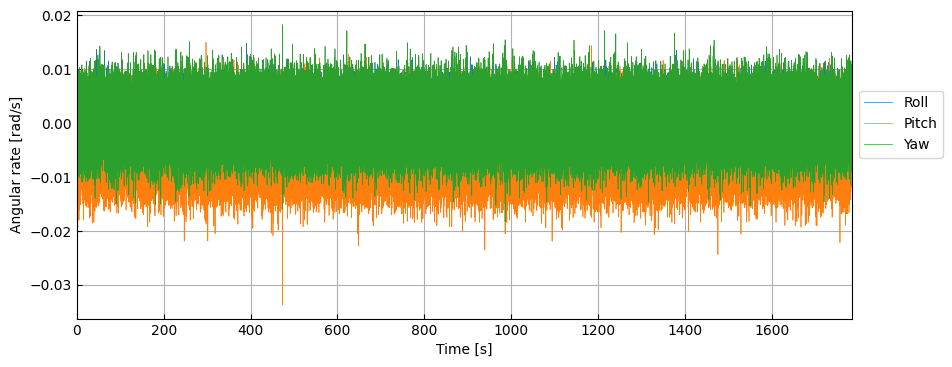

In [5]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(timestamp_ms, gyro_roll, linewidth=0.5)
ax.plot(timestamp_ms, gyro_pitch, linewidth=0.5)
ax.plot(timestamp_ms, gyro_yaw, linewidth=0.5)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Angular rate [rad/s]")
ax.set_xlim([0, timestamp_ms[-1]])
ax.grid()
ax.tick_params(axis='x', direction='in', which='both')
ax.tick_params(axis='y', direction='in', which='both')
ax.legend(['Roll', 'Pitch', 'Yaw'], loc='lower left', bbox_to_anchor=(1, 0.5))

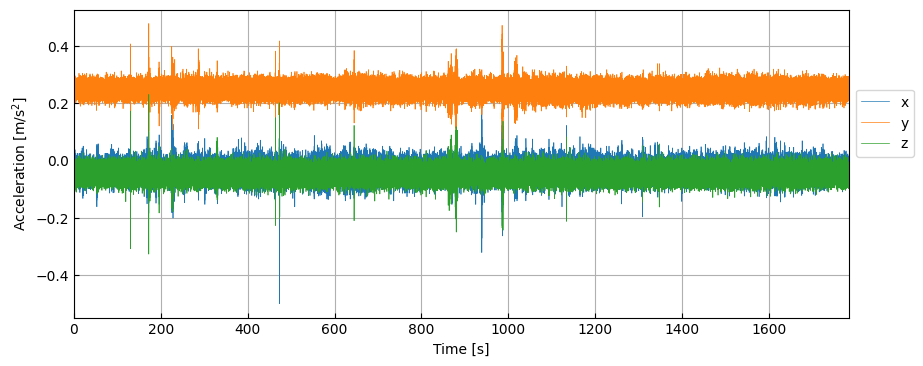

In [6]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(timestamp_ms, acc_x, linewidth=0.5)
ax.plot(timestamp_ms, acc_y, linewidth=0.5)
ax.plot(timestamp_ms, acc_z+g, linewidth=0.5)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Acceleration [$\mathrm{m/s^2}$]")
ax.set_xlim([0, timestamp_ms[-1]])
ax.grid()
ax.tick_params(axis='x', direction='in', which='both')
ax.tick_params(axis='y', direction='in', which='both')
ax.legend(['x', 'y', 'z'], loc='lower left', bbox_to_anchor=(1, 0.5))

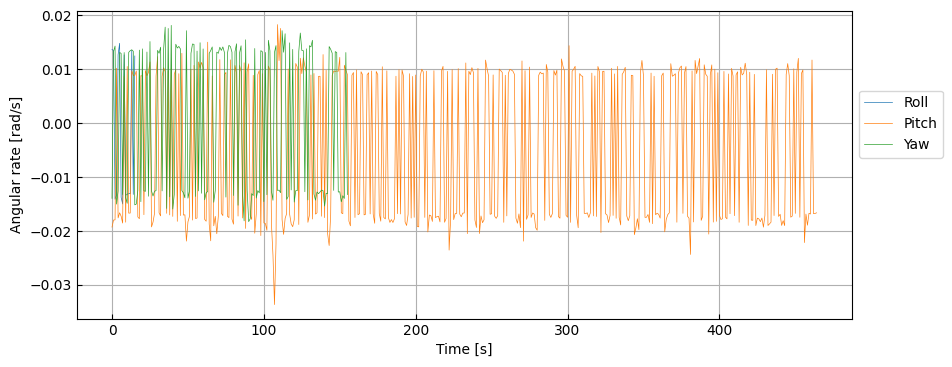

In [7]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(out_gyro_roll, linewidth=0.5)
ax.plot(out_gyro_pitch, linewidth=0.5)
ax.plot(out_gyro_yaw, linewidth=0.5)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Angular rate [rad/s]")
ax.grid()
ax.tick_params(axis='x', direction='in', which='both')
ax.tick_params(axis='y', direction='in', which='both')
ax.legend(['Roll', 'Pitch', 'Yaw'], loc='lower left', bbox_to_anchor=(1, 0.5))

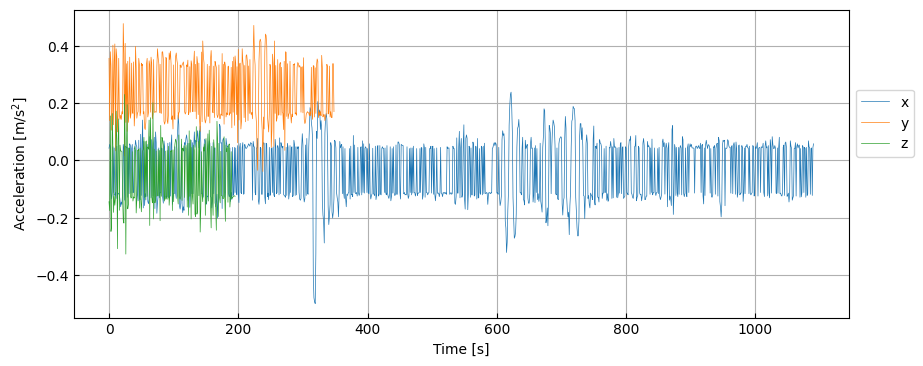

In [8]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(out_acc_x, linewidth=0.5)
ax.plot(out_acc_y, linewidth=0.5)
ax.plot(out_acc_z+g, linewidth=0.5)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Acceleration [$\mathrm{m/s^2}$]")
ax.grid()
ax.tick_params(axis='x', direction='in', which='both')
ax.tick_params(axis='y', direction='in', which='both')
ax.legend(['x', 'y', 'z'], loc='lower left', bbox_to_anchor=(1, 0.5))

In [11]:
# Check what the update rate is for the IMU:
periods = np.diff(timestamp_ms)
mean_p = np.mean(periods)
1/mean_p

99.42557012400152